## Logistic Regression 

### Project 1

In [63]:
import pandas as pd                     #data import and manipulation
import numpy as np                      #data manipulation
import matplotlib.pyplot as plt         #data visualization
import seaborn as sns                   #data visualization
from sklearn.model_selection import train_test_split #data split
from sklearn.linear_model import LogisticRegression  #LogisticModel
from sklearn.metrics import classification_report    #Model Evaluation
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [64]:
data = pd.read_csv('titanic_train-Copy1.csv')

In [65]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

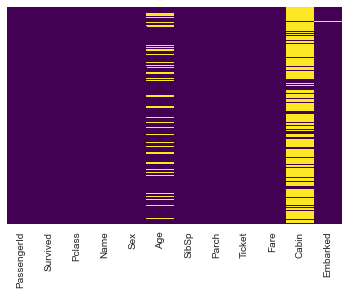

In [66]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [67]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

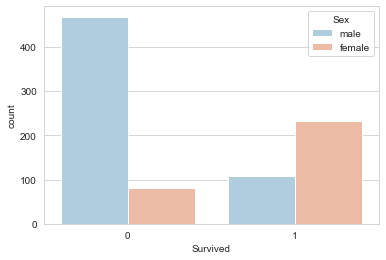

In [68]:
sns.countplot(x= 'Survived', hue = 'Sex', data= data, palette = 'RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

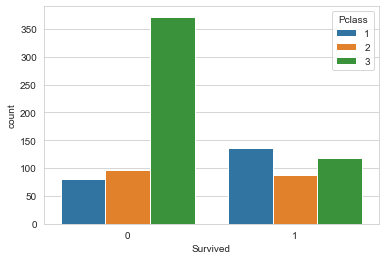

In [69]:
sns.countplot(x= 'Survived', hue = 'Pclass', data= data)

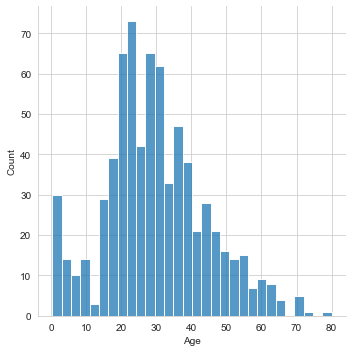

In [70]:
sns.displot(data['Age'].dropna(), kde = False, bins = 30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

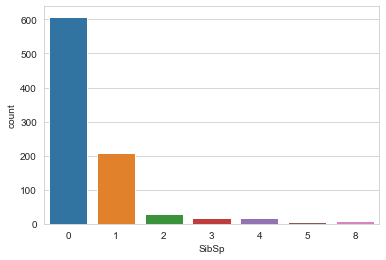

In [71]:
sns.countplot(x = 'SibSp', data = data)

<AxesSubplot:>

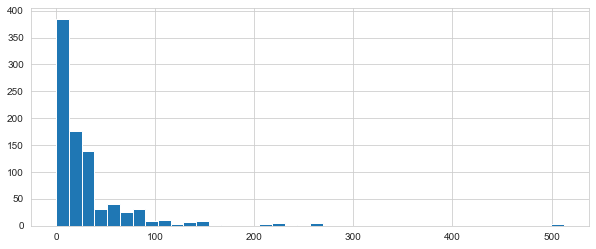

In [72]:
data['Fare'].hist(bins = 40, figsize = (10, 4))

In [73]:
import cufflinks as cf

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

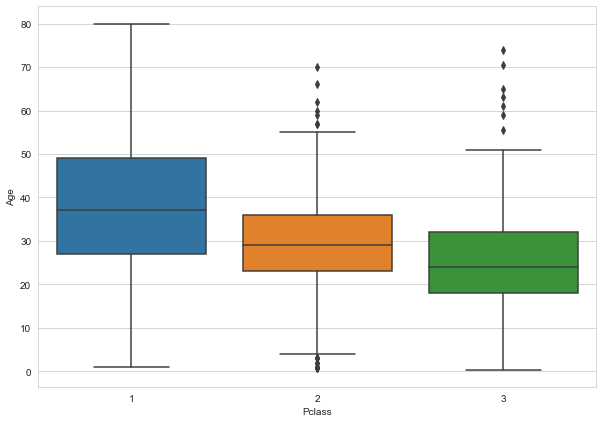

In [74]:
plt.figure(figsize = (10, 7))
sns.boxplot(x = 'Pclass', y = 'Age', data = data)

In [75]:
## Drop or replace missing values when neccessary  

In [76]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass ==2:
            return 29
        else: 
            return 24 
    else:
        return Age
            

In [77]:
data['Age'] = data[['Age', 'Pclass']].apply(impute_age, axis = 1)

In [78]:
data.drop('Cabin', axis = 1, inplace = True)

In [79]:
data.dropna(inplace = True)

In [80]:
sex = pd.get_dummies(data['Sex'],drop_first = True)

In [81]:
embark = pd.get_dummies(data['Embarked'], drop_first = True)

In [82]:
data = pd.concat([data, sex, embark], axis = 1)

In [83]:
data.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

In [84]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [85]:
data.drop('PassengerId', axis = 1, inplace = True)

In [86]:
#defining train and test dataset 
X = data.drop('Survived', axis = 1)
y = data['Survived']

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)


In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
logmodel = LogisticRegression()

In [90]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [91]:
predictions = logmodel.predict(X_test)

In [92]:
from sklearn.metrics import classification_report

In [93]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [94]:
from sklearn.metrics import confusion_matrix

In [95]:
confusion_matrix(y_test, predictions)

array([[147,  16],
       [ 30,  74]], dtype=int64)